In [322]:
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gkxmr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [323]:
df1=pd.read_csv('C:/Users/gkxmr/정리/go_Shinsegye.csv')

In [324]:
df1

,index,Unnamed: 0,이름,별점,리뷰,날짜
0,1,1,Insu Park,5,Very good department store,12 hours ago
1,5,5,전명환,5,Orangutan level,a day ago
2,9,9,Seon uk Kim,5,I like Shinsegae Headquarters,3 days ago
3,16,16,Beeny Bark,5,amazing,6 days ago
4,23,23,장기철,3,Was it in front of the central staircase in th...,a week ago
...,...,...,...,...,...,...
372,911,911,엑기스,5,It is conveniently connected directly from Exi...,8 months ago
373,914,914,Aung Ko,5,Very beautiful,8 months ago
374,915,915,김성수,4,Good Best department store,8 months ago
375,916,916,김석현,5,visit with parents I have to make a lot of mon...,8 months ago


In [325]:
senti_analyzer = SentimentIntensityAnalyzer()
list_pos=[]
list_neg=[]

for i in df1.index:
    senti_scores = senti_analyzer.polarity_scores(df1['리뷰'][i])
    if senti_scores['compound'] >0.05 and df1['별점'][i] >= 4 :
        list_pos.append(df1['리뷰'][i])
        #print()
        #print(len(list_pos))
    
    elif senti_scores['compound']<= -0.05 or df1['별점'][i] <4:
        list_neg.append(df1['리뷰'][i])
        #print()
        #print(len(list_neg))
    #print(senti_scores, " ",i)
print(len(list_pos))
print(len(list_neg))

212
66


In [326]:
df_p=pd.DataFrame({'POS':list_pos})
df_n=pd.DataFrame({'NEG':list_neg})
print( df_p.iloc[:,0])

0                             Very good department store
1                          I like Shinsegae Headquarters
2                                                amazing
3                                                be kind
4                                     Im glad youre kind
                             ...                        
207    It is conveniently connected directly from Exi...
208                                       Very beautiful
209                           Good Best department store
210    visit with parents I have to make a lot of mon...
211                                      Merry Christmas
Name: POS, Length: 212, dtype: object


In [327]:
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gkxmr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gkxmr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gkxmr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [337]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
#워드카운트를 위해 String 형태로 전환
review_str= ' '.join(list(df_p['POS'])).lower()
'''review_str[:500]
for i in review_str:
    i=stemmer.stem(i)'''

'review_str[:500]\nfor i in review_str:\n    i=stemmer.stem(i)'

In [338]:
stop_words = set(stopwords.words('english'))
add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't"]
for word in add_stop_words:
    stop_words.add(word)
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [339]:
#리뷰들을 토큰화 & 불용어제거
word_tokens = word_tokenize(review_str)
review_list = [] #리스트 형태 하나와 
review = '' #스트링 형태 하나를 만듦.
#for w in word_tokens: 
for w in word_tokens:
    if w not in stop_words: 
        review_list.append(w)
        review = review + ' ' + w

In [340]:
print("불용어 개수 : ", len(stop_words))
print("불용어 처리 전 : ", len(review_str))
print("불용어 처리 후 : ", len(review_list))
print("불용어 처리로 약 ", round(100-len(review_list)/len(review_str)*100, 1),"% 감소")

불용어 개수 :  189
불용어 처리 전 :  15055
불용어 처리 후 :  1525
불용어 처리로 약  89.9 % 감소


(department, store)        28
(main, store)               7
(take, picture)             7
(shinsegae, department)     7
(night, view)               6
(many, people)              6
(end, year)                 5
(best, department)          5
(staff, friendly)           4
(magical, holiday)          4
(easy, park)                3
(store, main)               3
dtype: int64


<ipython-input-342-c5cf4350cfcd>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new=pd.Series()


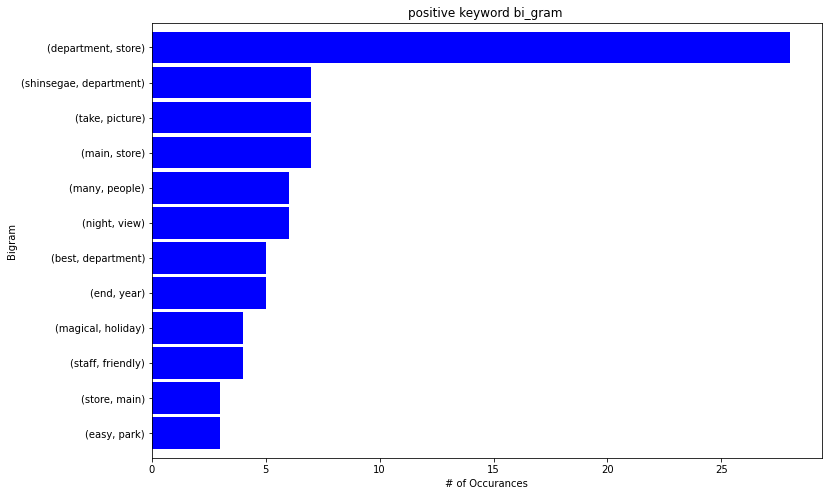

In [342]:
text2 = df_p[['POS']]
new=pd.Series()

 #토큰화
text2['POS'] = text2.apply(lambda row: nltk.word_tokenize(row['POS']), axis=1)

#불용어 처리
text2['POS'] = text2['POS'].apply(lambda x: [word.lower() for word in x])
text2['POS'] = text2['POS'].apply(lambda x: [word for word in x if word not in (stop_words)])
#표제어 추출
text2['POS'] = text2['POS'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

    
#길이가 3이하인 단어에 대해서 제거하는 작업을 수행
tokenized_doc = text2['POS'].apply(lambda x : [word for word in x if len(word) > 3])

#바이그램
for i in text2.index:
    new=new.append( (pd.Series(nltk.ngrams(text2['POS'][i], 2)))  )
k=new.value_counts()[:12]
print(k)

k.sort_values().plot.barh(color='blue', width=0.9, figsize=(12, 8))
plt.title('positive keyword bi_gram ')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
 #tf-idf 행렬을 만들기 위해 역토큰화
detokenized_doc = []
for i in range(len(text2)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
text2['POS'] = detokenized_doc


In [343]:
#LDA를 하기 위해 필요한 전처리들을 차례대로 진행하는 함수
#LDA를 하기 위해 필요한 전처리들을 차례대로 진행하는 함수
'''from nltk.stem import WordNetLemmatizer
new=pd.Series()
k=pd.Series()
def preprocess(df, stop_words):
    text = df_p[['POS']]

    #토큰화
    text['POS'] = text.apply(lambda row: nltk.word_tokenize(row['POS']), axis=1)

    #불용어 처리
    text['POS'] = text['POS'].apply(lambda x: [word.lower() for word in x])
    text['POS'] = text['POS'].apply(lambda x: [word for word in x if word not in (stop_words)])

    #표제어 추출
    text['POS'] = text['POS'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
    
    #길이가 3이하인 단어에 대해서 제거하는 작업을 수행
    tokenized_doc = text['POS'].apply(lambda x : [word for word in x if len(word) > 3])
    #바이그램
    for i in text.index:
        new=new.append( (pd.Series(nltk.ngrams(text['POS'][i], 2)))  )
    k=new.value_counts()[:12]
    print(type(k))
    k.sort_values().plot.barh(color='blue', width=0.9, figsize=(12, 8))
    plt.title('positive keyword bi_gram ')
    plt.ylabel('Bigram')
    plt.xlabel('# of Occurances')
    
    #tf-idf 행렬을 만들기 위해 역토큰화
    detokenized_doc = []
    for i in range(len(text)):
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
    text['POS'] = detokenized_doc
    
    return text['POS']'''

"from nltk.stem import WordNetLemmatizer\nnew=pd.Series()\nk=pd.Series()\ndef preprocess(df, stop_words):\n    text = df_p[['POS']]\n\n    #토큰화\n    text['POS'] = text.apply(lambda row: nltk.word_tokenize(row['POS']), axis=1)\n\n    #불용어 처리\n    text['POS'] = text['POS'].apply(lambda x: [word.lower() for word in x])\n    text['POS'] = text['POS'].apply(lambda x: [word for word in x if word not in (stop_words)])\n\n    #표제어 추출\n    text['POS'] = text['POS'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])\n    \n    #길이가 3이하인 단어에 대해서 제거하는 작업을 수행\n    tokenized_doc = text['POS'].apply(lambda x : [word for word in x if len(word) > 3])\n    #바이그램\n    for i in text.index:\n        new=new.append( (pd.Series(nltk.ngrams(text['POS'][i], 2)))  )\n    k=new.value_counts()[:12]\n    print(type(k))\n    k.sort_values().plot.barh(color='blue', width=0.9, figsize=(12, 8))\n    plt.title('positive keyword bi_gram ')\n    plt.ylabel('Bigram')\n    plt.xlabel('# of Occur

In [344]:
#LDA를 진행하는 함수
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


def LDA(series, n_components=4, n_words=10):
    
    #LDA를 적용하기 위해 tf-idf 행렬 만들기
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(series)
    
    #토픽 모델링 - 잠재디리클레할당
    lda_model = LatentDirichletAllocation(n_components=n_components, learning_method='online', random_state=777, max_iter=1)
    lda_top = lda_model.fit_transform(X)
    
    #term : 문서 내 모든 단어의 집합.
    terms = vectorizer.get_feature_names()
    
    #모델로부터 얻은 토픽과 그 tf-idf값을 반환받음.
    topics = []
    for idx, topic in enumerate(lda_model.components_):
        print("Topic %d :" % (idx+1), [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-n_words -1:-1]])
        topics.append([(terms[i]) for i in topic.argsort()[:-n_words -1:-1]])
    
    #결과물을 보기 좋게 데이터 프레임으로 출력.
    return topics

In [345]:
national_museum = LDA(text2["POS"], 9, 10)
national_museum[0]
#print(k)

Topic 1 : [('holiday', 1.57), ('magical', 1.56), ('shop', 1.41), ('free', 1.27), ('world', 1.18), ('duty', 1.13), ('experience', 1.08), ('media', 1.03), ('thank', 1.02), ('great', 1.0)]
Topic 2 : [('good', 4.56), ('like', 4.55), ('kind', 1.61), ('park', 1.42), ('store', 1.36), ('gorgeous', 1.23), ('hotple', 1.2), ('christmas', 1.19), ('steam', 1.17), ('faade', 1.15)]
Topic 3 : [('nice', 2.02), ('night', 1.87), ('view', 1.49), ('place', 1.24), ('beautiful', 1.23), ('best', 1.23), ('wonderful', 1.21), ('luxury', 1.18), ('solve', 1.14), ('attractions', 1.11)]
Topic 4 : [('pretty', 2.01), ('beautifully', 1.24), ('good', 1.24), ('colorful', 1.19), ('light', 1.17), ('background', 1.12), ('store', 1.08), ('awesome', 1.07), ('okay', 1.06), ('like', 1.04)]
Topic 5 : [('food', 1.71), ('good', 1.61), ('friendly', 1.54), ('delicious', 1.32), ('clean', 1.21), ('year', 1.09), ('splendor', 1.08), ('love', 1.07), ('shop', 1.05), ('happy', 1.02)]
Topic 6 : [('pretty', 2.45), ('store', 1.52), ('shinsega

['holiday',
 'magical',
 'shop',
 'free',
 'world',
 'duty',
 'experience',
 'media',
 'thank',
 'great']